# <font color=blue>Assignments for "Performance Measurement Metrics"</font>

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Load Data

In [2]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/melisademir/Desktop/Reg_Assign_1/Class_Assign_1/tit_train.csv', encoding="ISO-8859-1", low_memory=False)
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Check for null and missing values

In [3]:
df.dropna(subset=["Embarked"],inplace=True)

In [4]:
df["Sex"]=pd.get_dummies(df["Sex"],drop_first=True)

In [5]:
df['Cabin'].fillna(value='Unknown', inplace=True)
df['Age'] = df['Age'].apply(lambda x: np.random.randint(16,50) if (np.isnan(x)) else x)

### Define Model

In [6]:
X = df[['Age', 'Sex', 'Pclass']]
y = df.Survived


In [7]:
log_reg = LogisticRegression()

### Split training and validation set

In [8]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [9]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression()

In [10]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.79
Modelin test verisindeki doğruluğu   : 0.80


In [11]:
tahmin_eğitim = log_reg.predict(X_eğitim)
tahmin_test = log_reg.predict(X_test)


In [12]:
tahmin_test_ihtimal = log_reg.predict_proba(X_test)[:,1]
print(tahmin_test_ihtimal)

[0.73943873 0.11522615 0.64017762 0.08475789 0.09595429 0.54752288
 0.09895299 0.94095871 0.05794686 0.11874801 0.09595429 0.12236263
 0.08475789 0.80829039 0.22974947 0.09019971 0.66865295 0.12607154
 0.26792936 0.74144096 0.65337505 0.42242498 0.12236263 0.74144096
 0.10681704 0.05093548 0.34985297 0.89515614 0.04931228 0.75394571
 0.20650737 0.27466963 0.82705582 0.70033609 0.07961564 0.43914431
 0.8929131  0.10845445 0.93074468 0.10845445 0.06798524 0.28151426
 0.89191284 0.08475789 0.10845445 0.25476756 0.25675061 0.94463511
 0.85142211 0.68358357 0.11179549 0.11874801 0.58104115 0.07715277
 0.05794686 0.03557232 0.76365176 0.40396874 0.05611343 0.10845445
 0.09595429 0.11011387 0.64561341 0.07017772 0.37960103 0.22974947
 0.93291042 0.13902107 0.06585641 0.74792329 0.26997774 0.36551771
 0.12987623 0.29550992 0.75429694 0.90230789 0.12607154 0.40396874
 0.09303708 0.72608763 0.27466963 0.29060467 0.34985297 0.79581342
 0.29550992 0.33219045 0.08744053 0.28151426 0.7902172  0.4985

### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [14]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[381  64]
 [ 85 181]]
Hata Matrisi (Test verileri)
------------------------------
[[90 14]
 [22 52]]


In [15]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 90
Doğru pozitif sayısı   : 52
Yanlış pozitif sayısı  : 14
Yanlış negatif sayısı  : 22


### Accuracy

In [16]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.797752808988764
Hesaplanan doğruluk değeri      :  0.797752808988764
accuracy_score() değeri         :  0.797752808988764


### Precision

In [17]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.7878787878787878
precision_score() değeri        :  0.7878787878787878


### Recall/Sensitivity

In [18]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.7027027027027027
recall_score() değeri        :  0.7027027027027027


### Specificity

In [19]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8653846153846154


### F1 (F1 Score)

In [20]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.7428571428571429
f1_score() değeri     :  0.7428571428571429


### Classification Report

In [21]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       104
           1       0.79      0.70      0.74        74

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.80      0.80      0.80       178

f1_score() değeri        : 0.74
recall_score() değeri    : 0.70
precision_score() değeri : 0.79


Hassasiyet : [0.80357143 0.78787879]
Duyarlılık : [0.86538462 0.7027027 ]
F1 Skoru   : [0.83333333 0.74285714]


### ROC/AUC

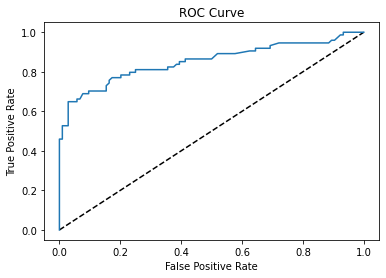

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [23]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))


AUC Değeri :  0.8521309771309771


In [24]:
c_değerleri = [10**i for i in range(-3,3)]
accuracy_values=pd.DataFrame(columns=["c_values","train_accuracy","test_accuracy"])

for c in c_değerleri:
    lr=linear_model.LogisticRegression(penalty="l2",C=c, random_state=0)
    lr.fit(X_eğitim,y_eğitim)
    accuracy_values=accuracy_values.append({"c_values":c,
                                           "train_accuracy":lr.score(X_eğitim,y_eğitim),
                                           "test_accuracy":lr.score(X_test,y_test)}, ignore_index=True)
    
display(accuracy_values)

,c_values,train_accuracy,test_accuracy
0,0.001,0.625879,0.584270
1,0.010,0.762307,0.730337
2,0.100,0.783404,0.797753
3,1.000,0.790436,0.797753
4,10.000,0.790436,0.797753
5,100.000,0.790436,0.797753


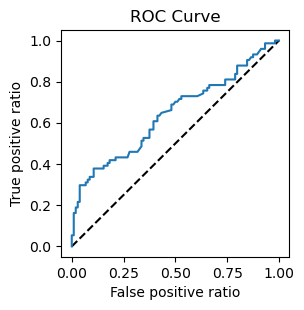

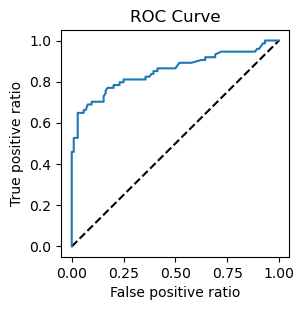

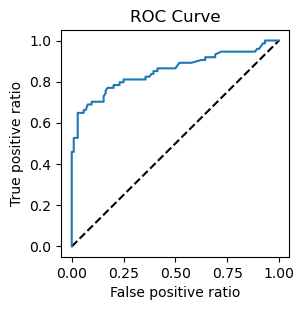

In [25]:
# c=0.001 için;
plt.figure(figsize=(10,3),dpi=100)
plt.subplot(1,3,1)
lr1=linear_model.LogisticRegression(C=0.001, random_state=0)
lr1.fit(X_eğitim,y_eğitim)
test_pred_proba1=lr1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba1)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve")


# c=10 için;
plt.figure(figsize=(10,3),dpi=100)
plt.subplot(1,3,2)
lr2=linear_model.LogisticRegression(C=10, random_state=0)
lr2.fit(X_eğitim,y_eğitim)
test_pred_proba2=lr2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba2)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve")



# c=1000 için;
plt.figure(figsize=(10,3),dpi=100)
plt.subplot(1,3,2)
lr3=linear_model.LogisticRegression(C=1000, random_state=0)
lr3.fit(X_eğitim,y_eğitim)
test_pred_proba3=lr2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve");


### Precision Recall Curve

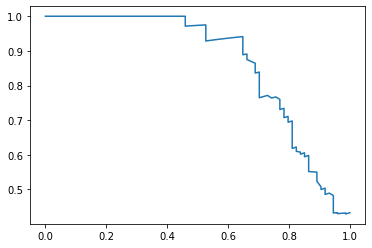

In [26]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

### Logarithmic Loss

In [27]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.4613743559120708
Hata Oranı                  :  0.202247191011236
